In [1]:
#Exercise 1
using Distributions
using Plots

type AR1
    a::Real
    b::Real
    sigma::Real
    phi::Distribution
end 
        

INFO: Recompiling stale cache file /home/nikhil/.julia/lib/v0.5/Distributions.ji for module Distributions.


In [2]:
function simulate(m:: AR1, n:: Integer, x0:: Real)
    X = Array(Float64,n)
    i = 1
    X[1] = x0
    while i < n
        X[i+1] = m.a * X[i] + m.b + rand(m.phi)
        i += 1
    end
    return X
end

simulate (generic function with 1 method)

In [3]:
m = AR1(0.9, 1, 1, Beta(4,4))

AR1(0.9,1,1,Distributions.Beta{Float64}(α=4.0, β=4.0))


 If the code has a Segmentation fault error switch to qt v4.8.5 by pasting the following code into julia: 
 
if !Plots.is_installed("PyPlot")
    Pkg.add("PyPlot")
end
withenv("PYTHON" => "") do
    Pkg.build("PyPlot")
end
import Conda
Conda.add("qt=4.8.5")

# now restart julia!



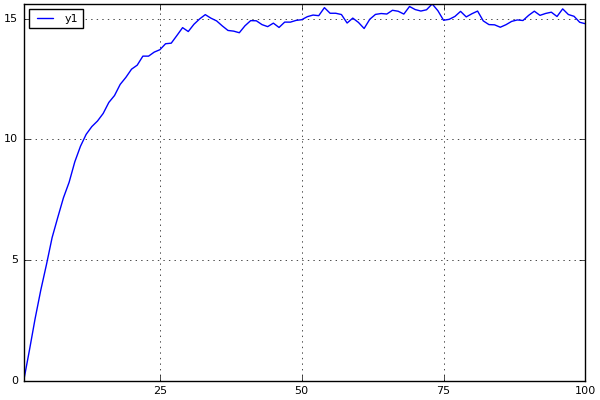

In [4]:
X = simulate(m, 100, 0.0)

plot(X, color ="blue")

In [7]:
#exercise 2


# for the integer case
function f(k::Integer)
    @assert k > 0 "must be pos and integer"
    z_score = randn(k)
    return sum(z_score.^2)
end

3.5745816818931244

In [8]:
#test case 1, does it work?
f(4)

1.3913341602629008

In [10]:
#test case 2, for neg numbers should crash and give errors
f(-4)

LoadError: AssertionError: must be pos and integer

In [11]:
#test case 3, for non integer numbers should crash
f(3.1415)

LoadError: MethodError: no method matching f(::Float64)[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[7]:6[0m

In [13]:
#test case 4,complex numbers should crash
f(2+im)

LoadError: MethodError: no method matching f(::Complex{Int64})[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[7]:6[0m

In [19]:
#vectorized version

function f(k_vec:: Array{T,N})
    for k in k_vec
        @assert k > 0 "still looking for natural numbers..."
    end
    N = length(k_vec)
    sample = Array(Float64, n)
    for i in 1:N
        z_score = randn(k_vec[i])
        sample[i] = (z_score.^2)
    end
    return sample
end



LoadError: UndefVarError: T not defined

In [20]:
f((1,2,3,4,5))

LoadError: MethodError: no method matching f(::Tuple{Int64,Int64,Int64,Int64,Int64})[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[7]:6
  f([1m[31m::Array{T,1}[0m) at In[14]:4
  f([1m[31m::Array{T,N}[0m) at In[17]:4[0m